### ***MARKETING CAMPAIGN*** - EDA + storytelling

In [6]:
# Install Kaggle CLI
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()  # odaberi kaggle.json

# Kreiraj folder
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d rodsaldanha/marketing-campaign

# Unzip
!unzip marketing-campaign.zip


Saving marketing-campaign.zip to marketing-campaign.zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
Archive:  marketing-campaign.zip
  inflating: marketing_campaign.csv  
  inflating: marketing_campai

In [7]:
import pandas as pd

#učitavanje dataseta
df = pd.read_csv("marketing_campaign.csv", sep=";")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
#provjera null vrijenosti

df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
#popunjavanje null vrijednosti za 'Income' medijanom

df['Income'].fillna(df['Income'].median(), inplace = True)
df.isnull().sum()

/tmp/ipython-input-2940770744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace = True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
from scipy import stats

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Income'].describe()

,Income
count,2240.000000
mean,52237.975446
std,25037.955891
min,1730.000000
25%,35538.750000
50%,51381.500000
75%,68289.750000
max,666666.000000


In [12]:
stats.describe(df['Income'])

DescribeResult(nobs=np.int64(2240), minmax=(np.float64(1730.0), np.float64(666666.0)), mean=np.float64(52237.97544642857), variance=np.float64(626899235.1807277), skewness=np.float64(6.7963923530735695), kurtosis=np.float64(161.03742372306237))

In [13]:
# uklanjanje outliera

df = df[df['Income'] < 200000]   # sve normalne vrijednosti ostaju
df['Income'].describe()
#(df['Income'] >= 200000).sum()

,Income
count,2239.000000
mean,51963.554712
std,21410.672116
min,1730.000000
25%,35533.500000
50%,51381.500000
75%,68277.500000
max,162397.000000


# ***EDA***


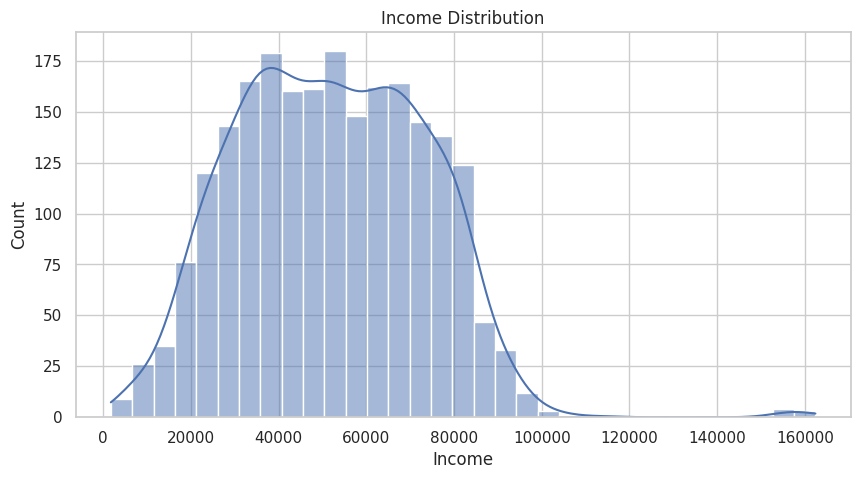

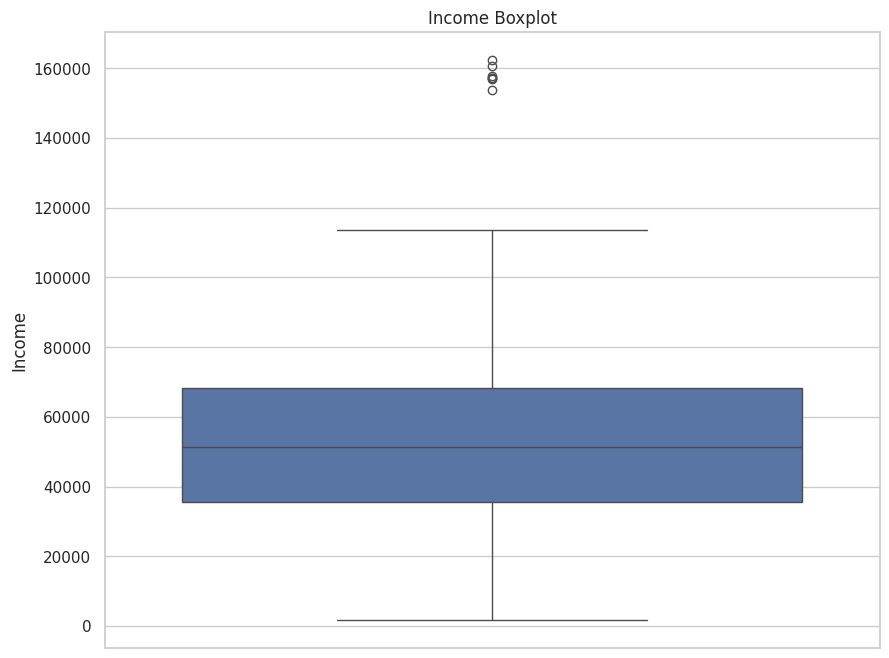

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Histogram za 'Income'
plt.figure(figsize=(10,5))
sns.histplot(df['Income'], kde = True)
plt.title("Income Distribution")
plt.show()

#Boxplot za 'Income'
plt.figure(figsize=(10,8))
sns.boxplot(df['Income'])
plt.title("Income Boxplot")
plt.show()

In [15]:
df['Total_Spending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

## ***KORELACIJSKA MATRICA***

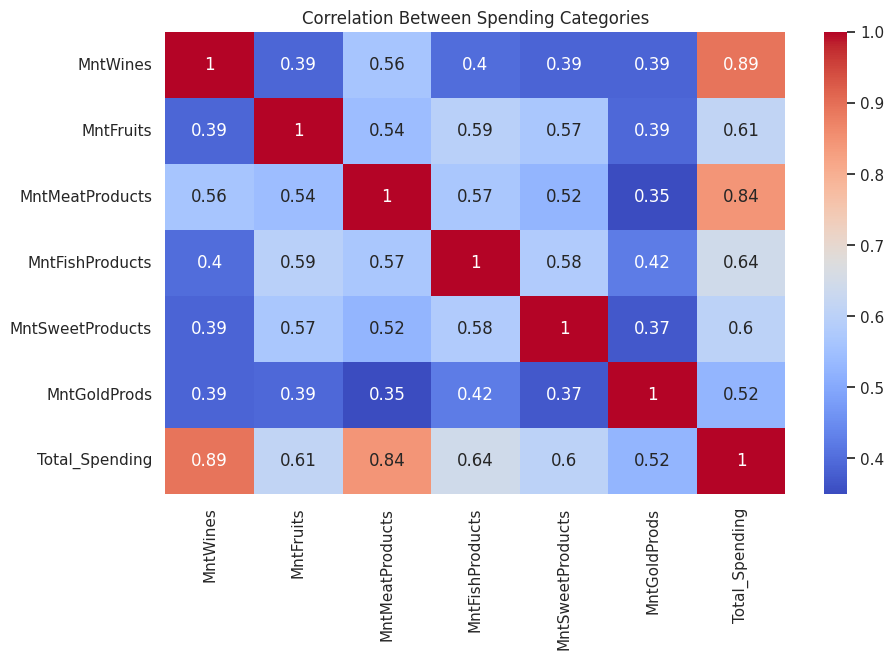

In [16]:
#Heatmap between spending categories
plt.figure(figsize=(10,6))
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Spending']
sns.heatmap(df[spending_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Spending Categories")
plt.show()

**Korelacijska matrica - ključni uvidi**

Iz heatmapa vidimo:

Najjače veze:


*   Wine - Total Spending (0.89)
*   Meat Product - Total Spending (0.84)
*   Fish Product - Fruits/Sweets (0.57-0.59)
Ljudi koji kupuju jednu kategoriju generalno kupuju i drugu

Take-away: Najveći doprinos ukupnoj potrošnji dolazi iz kupovine vina i mesnih proizvoda, što ukazuje da premium potrošači kupuju proizvode više vrijednosti. Većina kategorija je međusobno pozitivno povezana, što sugerira da postoje jasno definirani "high spender" kupci koji troše u više kategorija istovremeno.






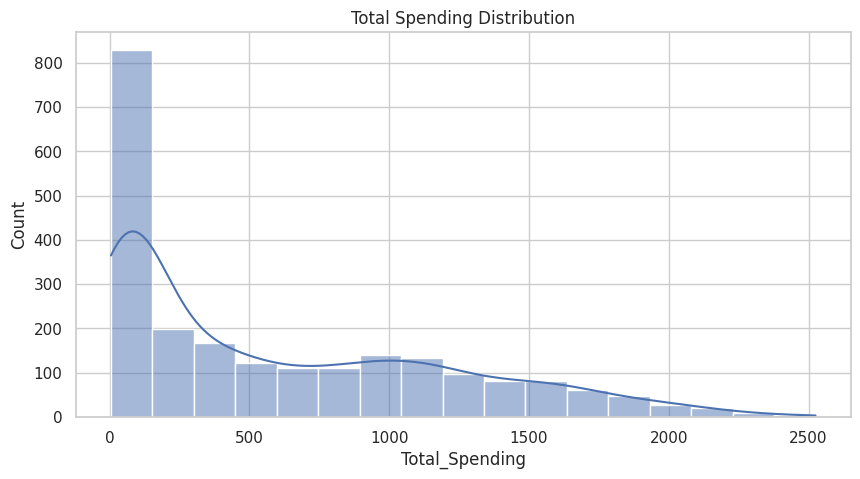

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['Total_Spending'], kde=True)
plt.title("Total Spending Distribution")
plt.show()

**Distribucija Total Spending — insight**

Histogram:

*   jako desno-skewed
*   velika baza kupaca troši 0-300€
*   postoji manja skupina high spenders (1000-2500€)

Take-away: Većina kupaca je niskopotrošna, ali postoji mala premium skupina s vrlo visokom potrošnjom. Ova segmentacija je idealna meta za personalizirane marketinške kampanje, jer mali broj kupaca generira velik dio prihoda.

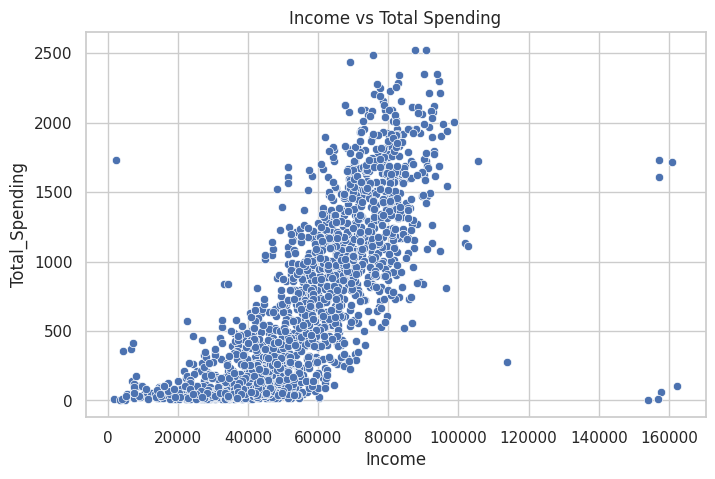

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Income'], y=df['Total_Spending'])
plt.title("Income vs Total Spending")
plt.show()

**Income vs Total Spending**

Scatter plot pokazuje:

*   jasnu pozitivnu linearnu vezu
*   kako prihod raste, potrošnja raste
*   vidljivi klasteri potrošnje

Take-away: Prihod je snažan prediktor potrošnje, ali distribucija pokazuje različite “raspršene” podskupine kupaca. Čak i među kupcima s istim prihodima postoje velike razlike u potrošnji, što ukazuje da prihod nije jedini faktor ponašanja kupaca. Ovo otvara vrata segmentaciji.



## **SEGMENTACIJA**

In [19]:
# 1) Segmentacija po broju djece

df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].value_counts()

,count
Children,
1,1127
0,638
2,421
3,53


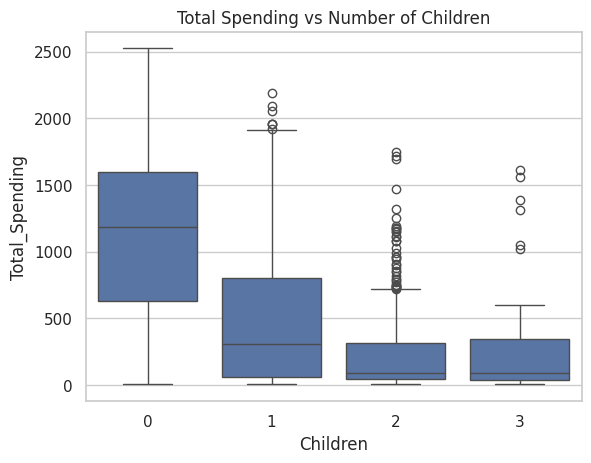

In [20]:
sns.boxplot(x='Children', y='Total_Spending', data=df)
plt.title("Total Spending vs Number of Children")
plt.show()

## **1. Kupci bez djece troše najviše**

To je potpuno logično i potvrđeno u mnogim poslovnim područjima — kupci bez djece imaju:

više raspoloživog prihoda

manje obiteljskih troškova

sklonost premium proizvodima

Ovo je fantastičan insight za marketing:
targetiraj kupce bez djece za premium kampanje (wine, meat, gold products).

In [23]:
# 2) Segmentacija prema prihodu

df['Income_Group'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])
df['Income_Group'].value_counts()


,count
Income_Group,
Low,747
Medium,746
High,746


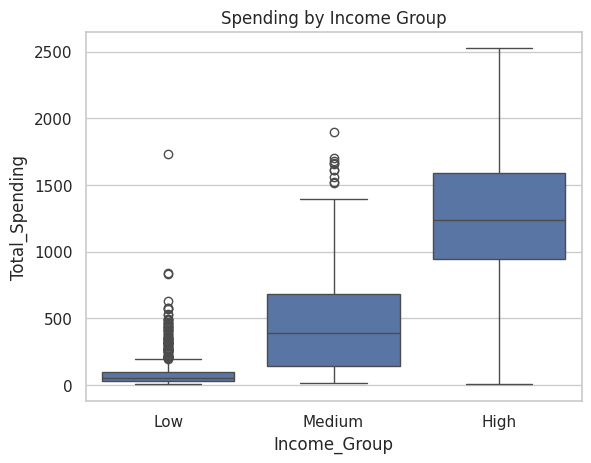

In [22]:
sns.boxplot(x='Income_Group', y='Total_Spending', data=df)
plt.title("Spending by Income Group")
plt.show()

## **2. High-income grupa dominantno troši najviše**

Graf to jasno pokazuje: razlike između low/medium/high income kupaca su velike.

To znači:

- high-income segment je ključan za prihod

- treba im slati personalizirane kampanje

- mogu se nuditi skuplji paketi i proizvodi

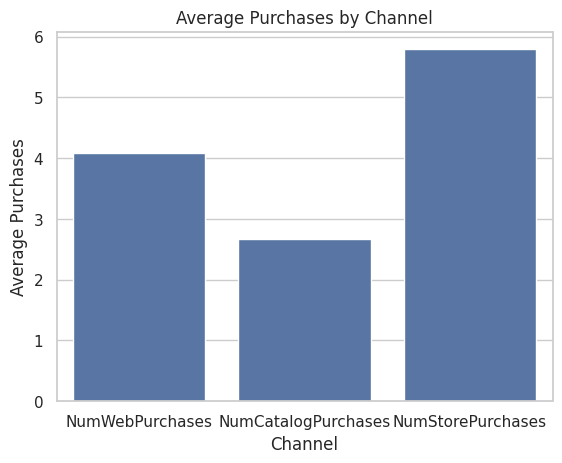

In [26]:
# 3) Segmentacija prema kupovnim kanalima

sns.barplot(data=df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].mean().reset_index(), x='index', y=0)
plt.title("Average Purchases by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Purchases")
plt.show()

## **3. Najviše kupuju u store → zatim web → najmanje catalog**

Ovo je bitan uvid za optimizaciju marketing strategije:

- Store je primarni kanal → ulaganje u loyalty programe ima smisla

- Web kupnja je velika → otvorena prilika za growth

- Catalog kupnja je gotovo zastarjela → trebalo bi smanjiti budžet

## ** BUSINESS INSIGHTS**

**1. High-income kupci i kupci bez djece generiraju najveći dio ukupne potrošnje.**

Marketinške kampanje trebaju biti ciljane prema njima (premium proizvodi, loyalty programi).

**2. Potrošnja je najviše povezana s kupnjom vina i mesnih proizvoda.**

To su kategorije koje najviše definiraju “visokovrijedne kupce”.

**3. Većina kupaca troši vrlo malo (0–300€), a mali broj kupaca troši ekstremno puno.**

Pareto efekt → 20% kupaca generira većinu prihoda.
To otvara priliku za high-value retention kampanje.

**4. Store je glavni kanal kupnje, ali web kupnja je na drugom mjestu i brzo raste.**

Digitalni marketing i optimizacija web kupnje mogu povećati prihod.

**5. Prihod snažno predviđa potrošnju, ali postoji značajna varijacija unutar svake grupe.**

→ segmentacija je nužna
→ nisu samo prihodi važni, nego i lifestyle & kupovne navike